# Import Library and Prepare Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [30]:
frameFilePath = "../Examples/Archive-Result/202404040906TUM/f_dataset-magistrale1_stereoi.txt"
kframeFilePath = "../Examples/Archive-Result/202404040906TUM/kf_dataset-magistrale1_stereoi.txt"
gtFilePath = "~/dataset/dataset-magistrale1_512_16/dso/gt_imu.csv"

In [31]:
col_names = ["timestamp", "x", "y", "z", "qx", "qy", "qz", "qw"]
df = pd.read_csv(frameFilePath, sep=' ', header=None, names=col_names)
gtdf = pd.read_csv(gtFilePath)

### TUM-VI Dataset Ground Truth Availability

- room : Sequences in the room with Motion Capture system, where ground truth poses are available for the entire trajectory.
- corridor : Sequences in the corridor and several offices where ground truth poses are available for the start and end segments.
- magistrale : Sequences in the large hall. **Ground truth poses are available for the start and end segments.**
- outdoors : Outdoor sequences. Ground truth poses are available for the start and end segments.
- slides : Specially changeling sequences which contain sliding down in a closed tube with very bad illumination inside. Ground truth poses are available for the start and end segments.

# EDA Axis

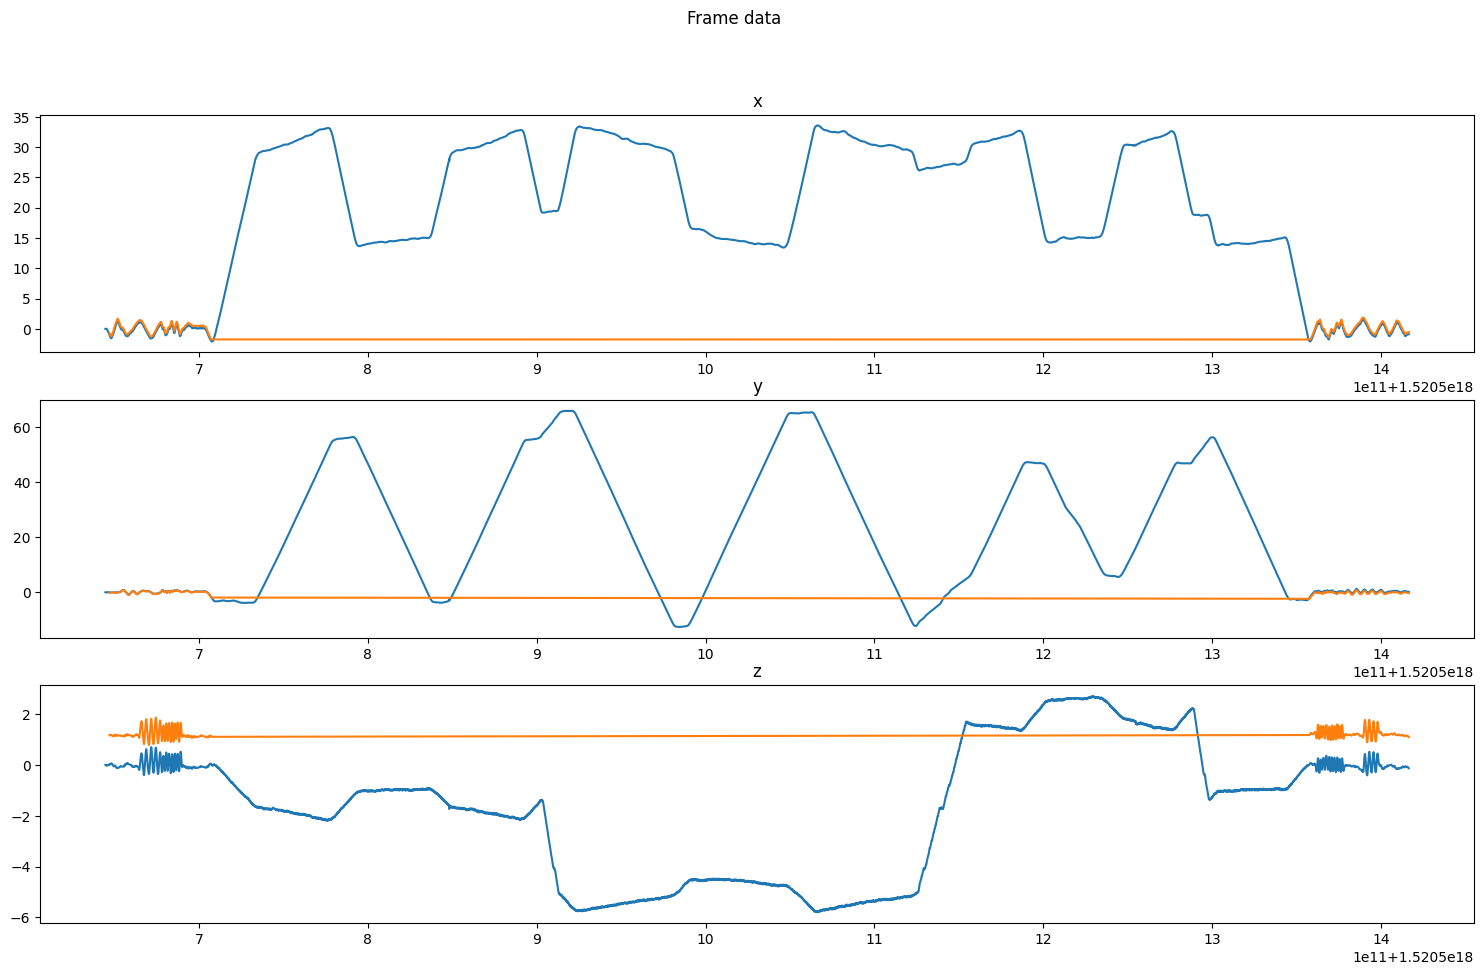

In [34]:
# plot each axis w.r.t timestamp in different subplots
fig, axs = plt.subplots(3)
fig.suptitle('Frame data')
axs[0].plot(df['timestamp'], df['x'])
axs[0].plot(gtdf['# timestamp[ns]'], gtdf['tx'])
axs[0].set_title('x')
axs[1].plot(df['timestamp'], df['y'])
axs[1].plot(gtdf['# timestamp[ns]'], gtdf['ty'])
axs[1].set_title('y')
axs[2].plot(df['timestamp'], df['z'])
axs[2].plot(gtdf['# timestamp[ns]'], gtdf['tz'])
axs[2].set_title('z')
#set figure size
fig.set_size_inches(18.5, 10.5)
plt.show()

# Route Construction

In [15]:
def plot_rectangular_3d_map(df):
    fig = go.Figure(data=[go.Scatter3d(
        x=df['x'],
        y=df['y'],
        z=df['z'],
        mode='markers',
        marker=dict(
            size=5,
            color=df['z'],  # Coloring based on z value
            colorscale='Viridis',
            opacity=0.8
        )
    )])

    # Camera settings to manipulate the view angle
    camera = dict(
        up=dict(x=0, y=0, z=1),
        center=dict(x=0, y=0, z=0),
        eye=dict(x=1.25, y=1.25, z=1.25)
    )

    fig.update_layout(
        title='3D Map from ORB SLAM Data',
        scene_camera=camera,
        width=1200,
        height=800
    )

    fig.show()

plot_interactive_3d_map(df)